In [42]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [43]:
import pandas as pd
import numpy as np

file_path = '/content/drive/My Drive/DataScience/Data/cleaned_merged_data_15days.csv'
df = pd.read_csv(file_path)

In [44]:
df

,group,Date,KWH,Next_3_Days_Energy_Total,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,1,2012-09-28,920.374,1031.111000,5.0,1.60,73.0,16.70,13.30,8.50,0.20,101300.0,0.0
1,1,2012-09-29,946.774,1045.833000,1.0,8.70,146.0,18.10,12.70,8.60,0.00,101830.0,0.0
2,1,2012-09-30,997.614,1059.146667,5.0,1.60,71.0,17.30,12.10,6.10,4.20,101870.0,0.0
3,1,2012-10-01,932.968,1051.590333,6.0,2.70,85.0,17.90,15.20,13.00,2.60,101190.0,0.0
4,1,2012-10-02,923.616,1039.082667,6.0,2.80,85.0,15.10,14.40,10.90,1.20,100970.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27323,55,2014-02-03,1089.332,1070.176000,3.0,1.00,34.0,9.40,6.10,3.40,0.00,100370.0,0.0
27324,55,2014-02-04,1061.265,1018.218000,5.0,3.90,57.0,10.10,6.80,4.20,11.20,99670.0,0.0
27325,55,2014-02-05,1106.654,1010.964667,6.2,1.66,53.4,9.74,6.80,4.46,3.80,101172.0,0.0
27326,55,2014-02-06,1119.021,993.217000,5.0,0.00,21.0,9.80,8.40,6.70,19.00,98980.0,0.0


In [45]:
df = df.rename(columns={'Next_3_Days_Energy_Total': 'Next_15_Days_Energy_Total'})

In [46]:
missing_counts = df.isna().sum()
print(missing_counts)

group                        0
Date                         0
KWH                          0
Next_15_Days_Energy_Total    0
cloud_cover                  0
sunshine                     0
global_radiation             0
max_temp                     0
mean_temp                    0
min_temp                     0
precipitation                0
pressure                     0
snow_depth                   0
dtype: int64


#### cloud_cover processing

In [47]:
df['cloud_cover'].value_counts()

6.000000    4366
7.000000    3901
4.000000    3644
8.000000    3620
5.000000    3436
3.000000    2694
2.000000    2255
1.000000    1644
0.000000    1430
5.400000      40
5.600000      33
5.200000      28
5.800000      26
4.800000      25
6.200000      25
4.600000      25
4.400000      21
6.600000      20
6.400000      18
4.200000      15
3.800000      11
2.800000       9
6.800000       8
3.200000       7
3.400000       5
7.200000       4
3.600000       4
7.400000       4
4.757959       3
2.600000       2
2.400000       2
7.600000       2
2.200000       1
Name: cloud_cover, dtype: int64

In [48]:
condition = (df['cloud_cover'] % 1 != 0) | (df['cloud_cover'] > 8.0)

# 从DataFrame中去除满足条件的行
df = df[~condition]

In [49]:
df['cloud_cover'].value_counts()

6.0    4366
7.0    3901
4.0    3644
8.0    3620
5.0    3436
3.0    2694
2.0    2255
1.0    1644
0.0    1430
Name: cloud_cover, dtype: int64

#### change the sunshine into hours

In [50]:
df['sunshine'] = df['sunshine'] * 60

#### change snow depth into a category value

In [51]:
df['snow_depth'].value_counts()

0.0    26767
3.0      110
2.0       55
5.0       55
1.0        1
0.6        1
1.2        1
Name: snow_depth, dtype: int64

In [52]:
df.loc[df['snow_depth'] > 0, 'snow_depth'] = 1.0

In [53]:
df['snow_depth'].value_counts()

0.0    26767
1.0      223
Name: snow_depth, dtype: int64

#### change the precipitation into category value

In [54]:
df['precipitation'].value_counts()

0.00    11479
0.20     3733
0.40      990
1.80      660
1.20      602
        ...  
4.08        1
2.44        1
0.48        1
3.48        1
3.56        1
Name: precipitation, Length: 133, dtype: int64

In [55]:
bins = [-float('inf'), 0.1, 2.5, 10, 50, float('inf')]
labels = [0, 1, 2, 3, 4]

df['precipitation'] = pd.cut(df['precipitation'], bins=bins, labels=labels, right=False)

In [56]:
df['precipitation'].value_counts()

0    11481
1     8784
2     5520
3     1205
4        0
Name: precipitation, dtype: int64

#### one-hot encoding

In [57]:
df_encoded = pd.get_dummies(df['cloud_cover'], prefix='cloud_cover')

df = pd.concat([df, df_encoded], axis=1)

df.drop('cloud_cover', axis=1, inplace=True)

In [58]:
df_encoded = pd.get_dummies(df['precipitation'], prefix='precipitation')

df = pd.concat([df, df_encoded], axis=1)

df.drop('precipitation', axis=1, inplace=True)

In [59]:
df_encoded = pd.get_dummies(df['snow_depth'], prefix='snow_depth')

df = pd.concat([df, df_encoded], axis=1)

df.drop('snow_depth', axis=1, inplace=True)

In [60]:
df.head(5)

,group,Date,KWH,Next_15_Days_Energy_Total,sunshine,global_radiation,max_temp,mean_temp,min_temp,pressure,...,cloud_cover_6.0,cloud_cover_7.0,cloud_cover_8.0,precipitation_0,precipitation_1,precipitation_2,precipitation_3,precipitation_4,snow_depth_0.0,snow_depth_1.0
0,1,2012-09-28,920.374,1031.111000,96.0,73.0,16.7,13.3,8.5,101300.0,...,0,0,0,0,1,0,0,0,1,0
1,1,2012-09-29,946.774,1045.833000,522.0,146.0,18.1,12.7,8.6,101830.0,...,0,0,0,1,0,0,0,0,1,0
2,1,2012-09-30,997.614,1059.146667,96.0,71.0,17.3,12.1,6.1,101870.0,...,0,0,0,0,0,1,0,0,1,0
3,1,2012-10-01,932.968,1051.590333,162.0,85.0,17.9,15.2,13.0,101190.0,...,1,0,0,0,0,1,0,0,1,0
4,1,2012-10-02,923.616,1039.082667,168.0,85.0,15.1,14.4,10.9,100970.0,...,1,0,0,0,1,0,0,0,1,0


In [61]:
df_out = df.copy()

#### delete the date

In [62]:
del df['Date']
del df['group']

In [63]:
df.head()

,KWH,Next_15_Days_Energy_Total,sunshine,global_radiation,max_temp,mean_temp,min_temp,pressure,cloud_cover_0.0,cloud_cover_1.0,...,cloud_cover_6.0,cloud_cover_7.0,cloud_cover_8.0,precipitation_0,precipitation_1,precipitation_2,precipitation_3,precipitation_4,snow_depth_0.0,snow_depth_1.0
0,920.374,1031.111000,96.0,73.0,16.7,13.3,8.5,101300.0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,946.774,1045.833000,522.0,146.0,18.1,12.7,8.6,101830.0,0,1,...,0,0,0,1,0,0,0,0,1,0
2,997.614,1059.146667,96.0,71.0,17.3,12.1,6.1,101870.0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,932.968,1051.590333,162.0,85.0,17.9,15.2,13.0,101190.0,0,0,...,1,0,0,0,0,1,0,0,1,0
4,923.616,1039.082667,168.0,85.0,15.1,14.4,10.9,100970.0,0,0,...,1,0,0,0,1,0,0,0,1,0


#### normalization

In [64]:
from sklearn.preprocessing import MinMaxScaler

features_to_normalize = ['sunshine', 'global_radiation', 'max_temp', 'mean_temp', 'min_temp', 'pressure', 'KWH']

scaler = MinMaxScaler()


df[features_to_normalize] = scaler.fit_transform(df[features_to_normalize])

#### check if any INF or NAN

In [65]:
inf_check = np.isinf(df)
print(inf_check.any())

KWH                          False
Next_15_Days_Energy_Total    False
sunshine                     False
global_radiation             False
max_temp                     False
mean_temp                    False
min_temp                     False
pressure                     False
cloud_cover_0.0              False
cloud_cover_1.0              False
cloud_cover_2.0              False
cloud_cover_3.0              False
cloud_cover_4.0              False
cloud_cover_5.0              False
cloud_cover_6.0              False
cloud_cover_7.0              False
cloud_cover_8.0              False
precipitation_0              False
precipitation_1              False
precipitation_2              False
precipitation_3              False
precipitation_4              False
snow_depth_0.0               False
snow_depth_1.0               False
dtype: bool


In [66]:
inf_check = np.isnan(df)
print(inf_check.any())

KWH                          False
Next_15_Days_Energy_Total    False
sunshine                     False
global_radiation             False
max_temp                     False
mean_temp                    False
min_temp                     False
pressure                     False
cloud_cover_0.0              False
cloud_cover_1.0              False
cloud_cover_2.0              False
cloud_cover_3.0              False
cloud_cover_4.0              False
cloud_cover_5.0              False
cloud_cover_6.0              False
cloud_cover_7.0              False
cloud_cover_8.0              False
precipitation_0              False
precipitation_1              False
precipitation_2              False
precipitation_3              False
precipitation_4              False
snow_depth_0.0               False
snow_depth_1.0               False
dtype: bool


In [67]:
import torch

if torch.cuda.is_available():
    device = torch.device("cuda")
    print("GPU is available and being used")
else:
    device = torch.device("cpu")
    print("GPU is not available, using CPU instead")

GPU is available and being used


In [68]:
from sklearn.model_selection import train_test_split

X = df.drop(['Next_15_Days_Energy_Total'], axis=1)
y = df[['Next_15_Days_Energy_Total']]

#### construct the LSTM model

In [69]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
from scipy.stats import pearsonr

class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size, time_step, dropout):
        super(LSTMModel, self).__init__()

        self.hidden_size = hidden_size

        self.time_step = time_step

        self.num_layers = num_layers

        # LSTM层
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout, bidirectional=True)

        # 整合
        self.fc1 = nn.Linear(hidden_size * 2 * self.time_step, hidden_size)

        # 输出层
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers * 2, x.size(0), self.hidden_size).to(x.device)
        c0 = torch.zeros(self.num_layers * 2, x.size(0), self.hidden_size).to(x.device)


        out, _ = self.lstm(x, (h0, c0))
        out = out[:, -self.time_step:, :]

        out = out.reshape(out.size(0), -1)

        out = self.fc1(out)
        out = self.fc2(out)
        return out



#### early stop function

In [70]:
# 定义早停函数
def early_stopping(val_loss, patience=10, delta=0):
  if len(val_loss) < patience + 1:
    return False

  best_loss = min(val_loss[:-patience])
  last_loss = val_loss[-1]

  if last_loss > best_loss - delta:
    return True

  return False

#### define function for training and validation

In [71]:
from torch.optim.lr_scheduler import StepLR

# 定义训练和验证过程
def train_and_validate_model(model, train_loader, val_loader, optimizer, criterion, num_epochs, patience=30, delta=0.5):
    train_loss_history = []
    val_loss_history = []
    best_model_state = None

    # 学习率衰减
    step_size = 15
    gamma = 0.95
    scheduler = StepLR(optimizer, step_size=step_size, gamma=gamma)

    # 训练模型
    for epoch in range(num_epochs):
        model.train()
        train_total_loss = 0.0
        for i, (X_batch, y_batch) in enumerate(train_loader):
            # Clear gradients from the previous iteration
            optimizer.zero_grad()

            # Forward pass: compute model predictions
            predictions = model(X_batch.to(device))
            #print('here is prediction：', predictions.shape)

            # Compute the loss
            loss = criterion(predictions, y_batch.to(device))
            #print('here is loss：', loss.item())

            # Backpropagation: compute gradients of the loss with respect to model parameters
            loss.backward()

            # Optimization: update model parameters using the gradients
            optimizer.step()

            # Accumulate the total loss for this epoch

            train_total_loss += loss.item()

            #print(total_loss)
        # Calculate the average loss for this epoch
        scheduler.step()
        train_loss = train_total_loss / len(train_loader)
        train_loss_history.append(train_loss)
        #print('toatl loss: ', total_loss)
        #print(len(train_loader))
        #print('average loss: ', average_loss)

        #if (epoch + 1) % 10 == 0:
        #    print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {average_loss:.4f}')

        model.eval()
        with torch.no_grad():
            val_total_loss = 0.0
            for batch_X, batch_y in val_loader:
                predictions = model(batch_X.to(device))
                loss = criterion(predictions, batch_y.to(device))
                val_total_loss += loss.item()
            validation_loss = val_total_loss / len(val_loader)
            val_loss_history.append(validation_loss)

        # 检查是否早停
        if early_stopping(val_loss_history, patience, delta):
            print("\n Early stopping triggered!")
            best_model_state = model.state_dict()
            break

    return best_model_state

#### reshape data

In [72]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

def reshape_data(X, y, num_channels):
    num_samples = X.shape[0] - num_channels + 1
    channels = [X.iloc[i:i+num_channels, :] for i in range(num_samples)]
    #x = num_channels
    X_reshaped = np.array(channels).reshape(num_samples, num_channels, X.shape[1])
    y_reshaped = y[-num_samples:]
    return X_reshaped, y_reshaped

#### fitness function

In [ ]:
def LSTM_fitness_function(params):

    # Defince the parameters
    hidden_size = int(params[0])
    num_layers = int(params[1])
    learning_rate = params[2]
    batch_size = [32, 64, 128, 256][int(params[3])]
    weight_decay = params[4]
    sequence_length = int(params[5])
    dropout = params[6]
    time_step = int(params[7])
    epoch = [500, 1000][int(params[8])]


    X_reshape, y_reshape = reshape_data(X, y, sequence_length)

    # 划分训练集为新的训练集和验证集
    X_train, X_test, y_train, y_test = train_test_split(X_reshape, y_reshape, test_size=0.2, random_state=42)

    # 划分训练集为新的训练集和验证集
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)



    torch.manual_seed(42)  # set the random seed

    X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
    y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).to(device)
    X_val_tensor = torch.tensor(X_val, dtype=torch.float32).to(device)
    y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32).to(device)
    X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
    y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).to(device)


    train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
    val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
    test_dataset = TensorDataset(X_test_tensor, y_test_tensor)


    # Specify the batch size
    batch_size = batch_size

    # Create DataLoaders for training, validation, and testing
    train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=batch_size)
    test_loader = DataLoader(test_dataset, batch_size=batch_size)



    # 初始化模型和优化器
    input_size = X_train.shape[2]
    output_size = y_train.shape[1]
    #device = torch.device("cuda")
    model = LSTMModel(input_size, hidden_size, num_layers, output_size, time_step, dropout).to(device)
    optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
    criterion = nn.L1Loss()
    num_epochs = epoch

    # train!!!
    best_model_state = train_and_validate_model(model, train_loader, val_loader, optimizer, criterion, num_epochs=num_epochs, patience=30, delta=0.001)
    #print('this is :', best_model_state)
    #model.load_state_dict(best_model_state)
    model.eval()

    with torch.no_grad():
        total_mae = 0.0
        for batch_X, batch_y in val_loader:
            # Forward pass: compute model predictions
            predictions = model(batch_X.to(device))

            # Compute the loss (assuming you have defined the loss function as 'criterion')
            mae = criterion(predictions, batch_y.to(device))

            # Accumulate the total loss for this validation set
            total_mae += mae.item()

        # Calculate the average loss for the entire validation set
        #print(total_mse)
        mae_loss = total_mae / len(val_loader)

        # Print the average loss for this validation set
        #print(f"Validation Loss: {validation_loss:.4f}")

    return mae_loss

In [ ]:
!pip install geneticalgorithm

#### GA

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.060899796322658406 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "



 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!
||________________________________________________ 4.0% GA is running...
 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!
||||______________________________________________ 8.0% GA is running...
 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!
||||||____________________________________________ 12.0% GA is running...
 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!
||||||||__________________________________________ 16.0% GA is running...
 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!
||||||||||________________________________________ 20.0% GA is running...
 Early stopping triggered!

 Early stopping trig

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.06597212043495573 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "



 Early stopping triggered!
||||||||||||||____________________________________ 28.0% GA is running...
 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!
||||||||||||||||__________________________________ 32.0% GA is running...
 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!
||||||||||||||||||________________________________ 36.0% GA is running...
 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!


/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.1615243295987073 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "



 Early stopping triggered!
||||||||||||||||||||______________________________ 40.0% GA is running...
 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!
||||||||||||||||||||||____________________________ 44.0% GA is running...
 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!
||||||||||||||||||||||||__________________________ 48.0% GA is running...
 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!
||||||||||||||||||||||||||________________________ 52.0% GA is running...
 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!
||||||||||||||||||||||||||||______________________ 56.0% GA is running...
 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!

 Early stopping triggered!
||||||||||||||||||||||||||||||_________________

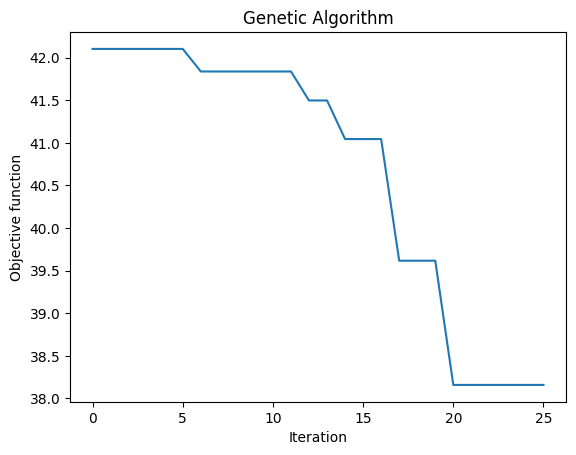

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from geneticalgorithm import geneticalgorithm as ga


varbound = np.array([          [10, 200],             # hidden size
                     [1, 3],                # number of layer
                     [0.005, 0.01],            # learning rate
                     [0, 3],               # batch size
                     [0, 0.01],              # L2 norm
                     [3, 10],               # sequence length
                     [0, 0.2],              # dropout
                     [1, 3],               # time step   (remember less than the sequence length)
                     [0, 1]                # epoch
                     ])



# 创建遗传算法对象
algorithm_param = {'max_num_iteration': 25, 'population_size': 5, 'elit_ratio': 0.01,
                   'parents_portion': 0.3, 'crossover_probability': 0.5, 'mutation_probability': 0.1,
                   'crossover_type': 'uniform', 'max_iteration_without_improv': 15}
model = ga(function=LSTM_fitness_function, dimension=9, variable_type='real',
           variable_type_mixed  = np.array(['int', 'int', 'real', 'int', 'real', 'int', 'real', 'int', 'int']) ,variable_boundaries=varbound,
           algorithm_parameters=algorithm_param, function_timeout = 500)

# 运行遗传算法进行优化
model.run()

# 获得优化的超参数组合
best_params = model.output_dict['variable']




In [73]:
# Defince the parameters
hidden_size = int(2.70000000e+01)
num_layers = int(1.00000000e+00)
learning_rate = 6.28192447e-03
batch_size = [32, 64, 128, 256][int(1.00000000e+00)]
weight_decay = 5.67412635e-03
sequence_length = int(6.00000000e+00)
dropout = 6.59721204e-02
time_step = int(2.00000000e+00)
epoch = [500, 1000][int(1.00000000e+00)]


X_reshape, y_reshape = reshape_data(X, y, sequence_length)

# 划分训练集为新的训练集和验证集
X_train, X_test, y_train, y_test = train_test_split(X_reshape, y_reshape, test_size=0.2, random_state=42)

# 划分训练集为新的训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)



torch.manual_seed(42)  # set the random seed

X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.float32).to(device)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32).to(device)
y_val_tensor = torch.tensor(y_val.values, dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.float32).to(device)


train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# Specify the batch size
batch_size = batch_size

# Create DataLoaders for training, validation, and testing
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)



# 初始化模型和优化器
input_size = X_train.shape[2]
output_size = y_train.shape[1]
#device = torch.device("cuda")
model = LSTMModel(input_size, hidden_size, num_layers, output_size, time_step, dropout).to(device)
optimizer = optim.Adam(model.parameters(), lr=learning_rate, weight_decay=weight_decay)
criterion = nn.L1Loss()
num_epochs = epoch

# train!!!
best_model_state = train_and_validate_model(model, train_loader, val_loader, optimizer, criterion, num_epochs=num_epochs, patience=30, delta=0.001)
#print('this is :', best_model_state)
#model.load_state_dict(best_model_state)

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/rnn.py:71: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.0659721204 and num_layers=1
  warnings.warn("dropout option adds dropout after all but last "



 Early stopping triggered!


In [74]:
def median_absolute_error(y_true, y_pred):
    absolute_errors = torch.abs(y_true - y_pred)
    return torch.median(absolute_errors).item()

In [75]:
def pearson_correlation(y_true, y_pred):
    y_true_mean = torch.mean(y_true)
    y_pred_mean = torch.mean(y_pred)
    numerator = torch.sum((y_true - y_true_mean) * (y_pred - y_pred_mean))
    denominator = torch.sqrt(torch.sum((y_true - y_true_mean) ** 2)) * torch.sqrt(torch.sum((y_pred - y_pred_mean) ** 2))
    pearson_corr = numerator / denominator
    return pearson_corr.item()

In [76]:
def index_of_agreement(y_true, y_pred):
    numerator = torch.sum((y_true - y_pred) ** 2)
    denominator = torch.sum((torch.abs(y_pred - torch.mean(y_true)) + torch.abs(y_true - torch.mean(y_true))) ** 2)
    index_agreement = 1 - (numerator / denominator)
    return index_agreement.item()

In [77]:
model.eval()

with torch.no_grad():
    total_mse = 0.0
    total_mae = 0.0
    total_md_ae = 0.0
    total_mape = 0.0
    total_rmspe = 0.0
    total_pearson_corr = 0.0
    total_index_agreement = 0.0
    predictions_list = []

    for batch_X, batch_y in test_loader:
        # Forward pass: compute model predictions
        predictions = model(batch_X.to(device))

        predictions_list.append(predictions.cpu().numpy())

        criterion = nn.MSELoss()

        # Compute the loss (assuming you have defined the loss function as 'criterion')
        mse = criterion(predictions, batch_y.to(device))
        total_mse += mse.item()

        # Compute the loss (MAE)
        mae = torch.mean(torch.abs(predictions - batch_y.to(device)))
        total_mae += mae.item()

        # Compute the loss (MdAE)
        md_ae = median_absolute_error(predictions, batch_y.to(device))
        total_md_ae += md_ae

        # Compute the loss (MAPE)
        absolute_percentage_errors = torch.abs((batch_y.to(device) - predictions) / batch_y.to(device))
        absolute_percentage_errors = absolute_percentage_errors[~torch.isinf(absolute_percentage_errors) & ~torch.isnan(absolute_percentage_errors)]
        mape = torch.mean(absolute_percentage_errors).item() * 100
        total_mape += mape

        # Compute the loss (RMSPE)
        squared_percentage_errors = ((batch_y.to(device) - predictions) / batch_y.to(device)) ** 2
        squared_percentage_errors = squared_percentage_errors[~torch.isinf(squared_percentage_errors)]
        rmspe = torch.sqrt(torch.mean(squared_percentage_errors)).item() * 100
        total_rmspe += rmspe

        # Compute the Pearson Correlation Coefficient
        pearson_corr = pearson_correlation(batch_y.to(device), predictions)
        total_pearson_corr += pearson_corr

        # Compute the Index of Agreement
        index_agreement = index_of_agreement(batch_y.to(device), predictions)
        total_index_agreement += index_agreement





        # Calculate the average loss for the entire validation set
        #print(total_mse)
    mse_loss = total_mse / len(test_loader)
    mae_loss = total_mae / len(test_loader)
    rmse_loss = np.sqrt(mse_loss)
    md_ae_loss = total_md_ae / len(test_loader)
    mape_loss = total_mape / len(test_loader)
    rmspe_loss = total_rmspe / len(test_loader)
    pearson_corr_avg = total_pearson_corr / len(test_loader)
    index_agreement_avg = total_index_agreement / len(test_loader)

print(f'MSE: {mse_loss:.4f}')
print(f'RMSE: {mae_loss:.4f}')
print(f'MAE: {rmse_loss:.4f}')
print(f'MdAE: {md_ae_loss:.4f}')
print(f'MAPE: {mape_loss:.4f}')
print(f'RMSPE: {rmspe_loss:.4f}')
print(f'Pearson Coefficient: {pearson_corr_avg:.4f}')
print(f'Index of Agreement (IoA): {index_agreement_avg:.4f}')


MSE: 4048.0507
RMSE: 39.1055
MAE: 63.6243
MdAE: 28.2723
MAPE: 3.7618
RMSPE: 5.1593
Pearson Coefficient: 0.9632
Index of Agreement (IoA): 0.9767


### prediction value

In [78]:
len(y_test)

5397

In [79]:
y_test.index

Int64Index([ 3641,   917,  9699, 22084, 16227,  6260, 19160, 26271, 24689,
             2087,
            ...
            16267,  3498, 11388,  1597, 14550, 15496, 16420, 11314,  3210,
            17198],
           dtype='int64', length=5397)

In [ ]:
predictions_list

In [81]:
predictions = []

for i in predictions_list:
    # 将张量展平为一维数组，并添加到 flat_predictions 列表中
    predictions.extend(i)

In [82]:
len(predictions)

5397

In [83]:
from sklearn.metrics import mean_absolute_error

# 假设 y_true 是实际值数组，y_pred 是预测值数组
mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 39.23010245009766


In [84]:
df_out = df_out.loc[y_test.index]

In [85]:
df_out['Predictions'] = predictions

In [86]:
df_out.to_csv('Bi-LSTM15day_EC.csv', index=False)

In [87]:
from google.colab import drive

# 将 Google Drive 挂载到 Colab
drive.mount('/content/drive')

# 假设 df 是您的 DataFrame，保存到 Google Drive 根目录下的 my_dataframe.csv 文件
df_out.to_csv('/content/drive/MyDrive/Bi-LSTM15day_EC.csv', index=False)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from sklearn.metrics import mean_squared_error

mae_loss = 39.1055

# 计算排列特征重要性
permutation_importances = []
for feature_idx in range(input_size):
    permuted_maes = []  # Use a different name for the list
    for batch_X, batch_y in val_loader:
        X_val_permuted = batch_X.clone()
        np.random.shuffle(X_val_permuted[:, :, feature_idx])
        X_val_permuted_tensor = X_val_permuted.to(device)
        with torch.no_grad():
            y_val_permuted_pred = model(X_val_permuted_tensor)
            permuted_mae = mean_squared_error(batch_y.cpu().numpy(), y_val_permuted_pred.cpu().numpy())
            permuted_maes.append(permuted_mae)  # Append the value to the list
    feature_importance = mae_loss - np.mean(permuted_maes)
    permutation_importances.append(feature_importance)

<ipython-input-38-4208b64c3003>:11: UserWarning: you are shuffling a 'Tensor' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(X_val_permuted[:, :, feature_idx])
<ipython-input-38-4208b64c3003>:11: UserWarning: you are shuffling a 'Tensor' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(X_val_permuted[:, :, feature_idx])
<ipython-input-38-4208b64c3003>:11: UserWarning: you are shuffling a 'Tensor' object which is not a subclass of 'Sequence'; `shuffle` is not guaranteed to behave correctly. E.g., non-numpy array/tensor objects with view semantics may contain duplicates after shuffling.
  np.random.shuffle(X_val_permuted[:, :, feature_idx])
<ipython-input-38-4208b64

<ipython-input-43-af2306441f77>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('magma')
<ipython-input-43-af2306441f77>:32: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  plt.colorbar(sm, label='Importance')


<Figure size 1000x600 with 0 Axes>

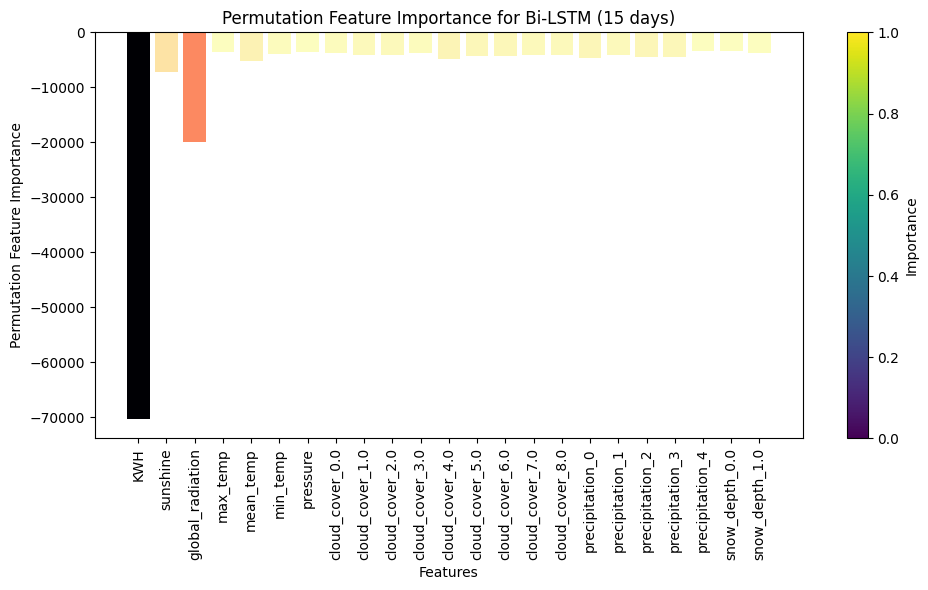

In [ ]:
import matplotlib.pyplot as plt

# 可视化特征重要性
plt.figure(figsize=(10, 6))  # 调整图像大小

# 使用不同颜色表示不同的特征重要性值

# 正则化特征重要性值到 [0, 1] 范围
normalized_importances = (permutation_importances - np.min(permutation_importances)) / (np.max(permutation_importances) - np.min(permutation_importances))

# 自定义颜色映射
cmap = plt.cm.get_cmap('magma')

# 使用正则化后的值来获得对应的颜色
colors = cmap(normalized_importances)

# 可视化特征重要性
plt.figure(figsize=(10, 6))  # 调整图像大小

bars = plt.bar(range(len(permutation_importances)), permutation_importances, color=colors)
plt.xticks(range(len(permutation_importances)), ["KWH", "sunshine", "global_radiation", "max_temp", "mean_temp", "min_temp", "pressure", "cloud_cover_0.0", "cloud_cover_1.0",
    "cloud_cover_2.0", "cloud_cover_3.0", "cloud_cover_4.0", "cloud_cover_5.0", "cloud_cover_6.0", "cloud_cover_7.0",
    "cloud_cover_8.0", "precipitation_0", "precipitation_1", "precipitation_2", "precipitation_3", "precipitation_4",
    "snow_depth_0.0", "snow_depth_1.0"], rotation=90)  # 旋转 x 轴标签
plt.xlabel('Features')
plt.ylabel('Permutation Feature Importance')
plt.title('Permutation Feature Importance for Bi-LSTM (15 days)')

# 添加颜色条
sm = plt.cm.ScalarMappable(cmap=plt.cm.viridis)
sm.set_array([])
plt.colorbar(sm, label='Importance')

plt.tight_layout()  # 调整布局以避免重叠
plt.show()
